# Acid-Base Equilibria in pyMBE - Part I: The Constant-pH Method

The main use case of pyMBE is to facilitate the setup of complex macromolecules with chemically reactive acid and/or base groups in ESPResSo. In this two-part tutorial, you will learn how to set up chemical reactions using pyMBE. The first part focuses on single-phase systems and the constant-pH method. Part II will introduce the more complicated grand-reaction method, which can be used to model two-phase systems. It is highly recommended to first complete part I before proceeding to the second part of the tutorial, since essential concepts are introduced here.

## Prerequisites 

You should be familiar with the following concepts and topics in order to effectively work with this tutorial:
- Setting up and running coarse-grained simulations in ESPResSo, please refer to the [introductory tutorials](https://espressomd.github.io/tutorials.html)
- How to set up particles and molecules in ESPResSo using pyMBE, as described in the [first tutorial](https://github.com/pyMBE-dev/pyMBE/blob/main/tutorials/pyMBE_tutorial.ipynb)
- Elementary thermodynamics and statistical physics

## Table of contents:
* [Introduction: Charge Regulation in Soft Matter](#introduction)
* [Theory of Chemical Equilibria](#theory)
* [The Constant-pH Method](#method)
* [Setting Up Reactive Acid and Base Particles](#reactive_particles)
* [Setting Up Charge Regulating Peptides](#peptides)
* [Conclusion and Outlook](#conclusion)

## Introduction: Charge Regulation in Soft Matter <a class="anchor" id="introduction"></a>

Electrostatic interactions play in important role in many systems consisting of soft and biological matter. For example, most biomacromolecules, such as nucleic acids (DNA, RNA) and many proteins, carry electrical charges, profoundly influencing their behavior in vitro and in vivo. Furthermore, electrostatic interactions are also leveraged in synthetic systems such as polyelectrolytes and charged colloids, enabling their use in many technological applications. Accounting for electrostatic interactions in a theoretical description of a system is challenging due to the long-range nature of the Coulomb potential. Nevertheless, significant progress has been made in the theory and simulation of charged soft matter in recent decades.

An interesting class of phenomena occurring in charged systems are categorized under the label "charge regulation". Generally speaking, charge regulation refers to the capacity of many macromolecules to modify their electrical charge in response to external stimuli such as the pH-value, the salt concentration and even the presence of other charged objects. This remarkable ability emerges due to the presence of chemically reactive groups, whose ionization state changes in response to various external factors. While charge regulation can significantly alter the behavior of a system, most simulation studies of charged soft matter neglect charge regulation effects. Presumably, this is the case because the modeling of charge regulation requires non-standard simulation methods not easliy accessible to non-experts. To close this gap, pyMBE, in combination with the ESPResSo software, aims to facilitate the simulation setup of complex molecules with many charge regulating groups, thus enabling a more wide-spread use of these simulation methodologies.

## Theory of Chemical Equilibria <a class="anchor" id="theory"></a>

### Chemical Equilibria and the Law of Mass-Action

As explained above, the phenomenon of charge regulation is caused by the presence of chemically reactive groups that can alter their ionization state. In the absence of external fluxes of mass or energy, any thermodynamic system containing chemically reactive species will eventually relax into an equilibrium state known as a chemical equilibrium. If a system is in chemical equilibrium, the concentrations of the various chemical species do not change in time, since the reaction rate of each reaction is equal to that of the reverse reaction. In the following, we will focus on such equilibrium states, since they can be described in a unified theoretical framework, the so-called law of mass action. The application of the law of mass action to acid-base equilibria will then be described in the following section.

The law of mass action can be derived by applying equilibrium thermodynamics to a chemical reaction, which is standard textbook knowledge in statistical physics and physical chemistry. Let us consider a general chemical reaction of the form 
$$-\nu_1 S_1 -\nu_2 S_2 + ... -\nu_r S_r \rightleftharpoons \nu_{r+1} S_{r+1} + \nu_{r+2} S_{r+2} + ... +\nu_{r+p} S_{r+p}.$$
In this equation, $S_1,...S_r$ denote the $r$ different species of reactants and $S_{r+1},...S_{r+p}$ are the $p$ different species of products. The prefactors $\nu_i$ are called stoichiometric coefficients and are by definition negative for reactants and positive for products. Applying the thermodynamic equilibrium conditions, which lead to a minimal free energy, to such a reaction, results in the law of mass action
$$ K = \prod_{i=1}^{r+p} a_i^{\nu_i}.$$
Here, $K$ is a dimensionless constant known as the chemical equilibrium constant. The symbol $a_i$ denotes the activity of species $i$, which is defined as
$$ a_i \equiv \frac{c_i}{c^\ominus} \cdot \exp(\beta \mu_i^\mathrm{ex}).$$
In the above definition, $c_i$ is the concentration of species $i$, $\mu_i^\mathrm{ex}$ its excess chemical potential and $c^\ominus$ a reference concentration chosen as $c^\ominus = 1\,\mathrm{M}$ in the following. Although the law of mass action has a very simple mathematical form, it cannot be evaluated exactly for most interacting systems, since the excess chemical potentials are in general not known. Nevertheless, it provides a useful starting point for various approximate analytical and numerical approaches to chemical equilibria.

### Application to Acid-Base Equilibria: the Henderson-Hasselbalch Equation

- derive henderson-hasselbalch equation (general)
- give form for an ideal system

Weak acids and bases are an important class of molecules that can partake in chemical equilibria. They are especially interesting from the point of view of charge regulation, since they can alter their ionization state by the binding or release of a proton. Formally, the dissociation-association equilibrium of a weak acid HA can be written as
$$\text{HA} \rightleftharpoons \text{A}^{-} + \text{H}^{+},$$
where $\text{A}^{-}$ denotes the acid in the ionized (deprotonated) form and $\text{H}^{+}$ a proton. Similarly, for a weak base B we have 
$$\text{BH}^{+} \rightleftharpoons \text{B} + \text{H}^{+},$$
with the protonated base $\text{BH}^{+}$. 

The ionization behavior of weak acids and bases can be theoretically described using the law of mass action. In the following, we focus on the case of an acid, however, bases can be considered completely analogously. Applying the law of mass action to the chemical equation introduced above, we obtain
$$K_\text{A} = \frac{a_{\text{H}^{+}}a_{\text{A}^{-}}}{a_{\text{HA}}},$$
where we have used the standard nomenclature $K_\text{A}$ for the dissociation constant of a weak acid. An important control parameter in aqueous solutions

## The Constant-pH Method <a class="anchor" id="method"></a>

## Setting Up Reactive Acid and Base Particles <a class="anchor" id="reactive_particles"></a>

pyMBE allows to set up cpH simulations of complex molecules with many different acidic and basic residues in ESPResSo. In a first step, we will now learn how to specify the acidity of simple particles and set up reactions. Later on, we will consider a complex charge regulating polypeptide.

Let us get started by importing the required libraries and setting up pyMBE:

In [1]:
# Import pyMBE and  ESPResSo
import pyMBE
import espressomd

# Import some other libraries
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

# Create an instance of pyMBE
pmb = pyMBE.pymbe_library(seed=42)

# Units and general parameters
pmb.set_reduced_units(unit_length=0.355*pmb.units.nm)
solvent_permittivity = 78.9

Current set of reduced units:
0.355 nanometer = 1 reduced_length
4.1164e-21 joule = 1 reduced_energy
1.6022e-19 coulomb = 1 reduced_charge
Temperature: 298.15 kelvin


In the first tutorial, you already learned how to define particles in pyMBE. By default, particles in pyMBE are inert, i.e. they are chemically non-reactive. However, when defining a particle, it is also possible to specify the `acidity` (either `acidic` or `basic`) as well as the corresponding $\mathrm{p}K_\mathrm{A}$-value. For example, we can define a particle type `A` that corresponds to a weak acid with $\mathrm{p}K_\mathrm{A}=4.0$:

In [2]:
pmb.define_particle(name='A', 
                    acidity='acidic', 
                    pka=4.0,
                    sigma=1*pmb.units('reduced_length'), 
                    epsilon=1*pmb.units('reduced_energy'))

Completely analogous to the inert case, we can also define a corresponding residue and assemble multiple residues into a chain, i.e. a weak polyacid. We also define a covalent bond between the monomers of the polyacid:

In [3]:
pmb.define_residue(name='rA', 
                   central_bead="A", 
                   side_chains=[])

pmb.define_molecule(name='polyacid', 
                    residue_list=['rA']*10)

bond_type = 'FENE'
fene_spring_constant = 30 * pmb.units('reduced_energy / reduced_length**2')
fene_r_max = 1.5 * pmb.units('reduced_length')

fene_bond = {'k'      : fene_spring_constant,
             'd_r_max': fene_r_max, 
            }

pmb.define_bond(bond_type = bond_type, bond_parameters = fene_bond, particle_pairs = [['A','A']])

To be able to set up the reactions in the cpH-ensemble, we also need to define a counterion (a cation in the case of a weak acid). We simply call it `cation` instead of $\mathrm{H}^+$ due to the ambiguity mentioned above:

In [4]:
pmb.define_particle(name='cation',
                    z=1,
                    sigma=1*pmb.units('reduced_length'), 
                    epsilon=1*pmb.units('reduced_energy'))

Now we can initialize our ESPResSo system, add the bonds to ESPResSo and create a single polyacid molecule in the system:

In [5]:
espresso_system = espressomd.System(box_l = [20*pmb.units('reduced_length').magnitude]*3)

pmb.add_bonds_to_espresso(espresso_system=espresso_system)

pmb.create_pmb_object(name = 'polyacid',
                      number_of_objects = 1,
                      espresso_system = espresso_system)

Note that apart from the bonded interactions between monomers, we have not added any non-bonded interactions (either electrostatic or Lennard-Jones) yet. This means that the system will behave according to the ideal theory and we can compare the ionization state obtained from the simulation to the Henderson-Hasselbalch equation. 

Setting up the chemical reactions using pyMBE is straightforward, we just have to invoke `setup_cpH` with the desired cation and pH-value:

In [6]:
cpH, labels = pmb.setup_cpH(counter_ion="cation",
                            constant_pH=4.0)

`cpH` is an instance of a `reaction_methods.ConstantpHEnsemble` object in ESPResSo, which can be used to perform Monte Carlo steps in the cpH-ensemble. As a sanity check, let us calculate the mean degree of ionization for the given pH-value of $\mathrm{pH}=\mathrm{p}K_\mathrm{A}=4.0$, for which we expect a degree of ionization $\alpha=0.5$. Note that we do not need integration steps here due to the ideal nature of the system.

In [10]:
alphas = []
for i in tqdm(range(100)):
    cpH.reaction(reaction_steps=10)
    charge_dict = pmb.calculate_net_charge(espresso_system=espresso_system, 
                                           molecule_name='polyacid', 
                                           dimensionless=True)
    alphas.append(-1.0*charge_dict['mean']/10)

print("\n Measured degree of ionization:", np.mean(alphas))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 34.48it/s]


 Measured degree of ionization: 0.511


In the above code snippet, we used the pyMBE function `calculate_net_charge` to calculate the net charge on the polyacid molecule. This number has to be multiplied by $-1$ (since the ionized acid is negative) and normalized by the number of monomers per chain to obtain the degree of ionization. As expected, the degree of ionization measured in the simulation is close to the analyztical value $\alpha=0.5$. An even better agreement can be obtained by using a larger number of Monte Carlo samples.

**Now it is your turn to practice running simulations for reactive systems using pyMBE and ESPResSo. Implement a function `sample_alpha(pH)` that sets the correct pH-value (passed as the argument of the function), runs a short equilibration (50 reaction steps should be sufficient) and then samples the degree of ionization over 100 loops as above. The function should return the averaged degree of ionization.**

In [19]:
def sample_alpha(pH):
    # Set the correct pH-value
    cpH, labels = pmb.setup_cpH(counter_ion="cation",
                                constant_pH=pH)

    # Equilibration
    cpH.reaction(reaction_steps=50)

    # Sampling
    alphas = []
    for i in range(100):
        cpH.reaction(reaction_steps=10)
        charge_dict = pmb.calculate_net_charge(espresso_system=espresso_system, 
                                           molecule_name='polyacid', 
                                           dimensionless=True)
        alphas.append(-1.0*charge_dict['mean']/10)

    return np.mean(alphas)

**Now, calculate the degree of ionization for a range of pH-values and plot the result as a function the pH.**

In [20]:
pH_values = [1.0 + i for i in range(7)]
alpha_values = []

for pH in tqdm(pH_values):
    alpha_values.append(sample_alpha(pH))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.23s/it]


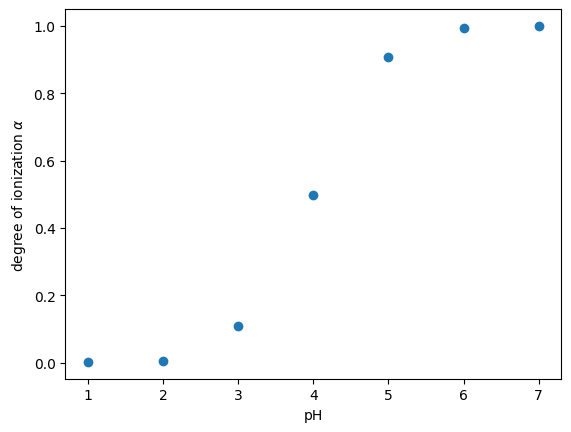

In [21]:
plt.plot(pH_values, alpha_values, linestyle="none", marker="o")
plt.xlabel(r"pH")
plt.ylabel(r"degree of ionization $\alpha$")
plt.show()

To check the quality of the simulation results, it is useful to directly compare the data to the prediction by the Henderson-Hasselbalch equation. This kind of comparison is not only meaningful for ideal systems, but also serves as an important reference for interacting systems, because it allows for an assessment of the importance of (electrostatic) interactions on the ionization behavior. For a simple polyacid as considered here, the Henderson-Hasselbalch equation is straightforward to write down. In contrast, for complex molecules with many different titrable acid and base groups, it becomes cumbersome to keep track of the different particles, their $\mathrm{p}K_\mathrm{A}$-values, etc. Luckily, pyMBE contains a function `calculate_HH` that allows the user to calculate the ideal charge on arbitrarily complex charge regulating molecules. For example, for the polyacid we get the following charge for $\mathrm{pH}=4.0$:

In [22]:
Z_HH = pmb.calculate_HH(molecule_name='polyacid',
                        pH_list = [4.0])
print(Z_HH)

[-5.0]


**Use the function `calculate_HH` to calculate the Henderson-Hassebalch prediction for $\alpha$ of the polyacid and for a range of pH-values. Create a plot that contains both this prediction and the degree of ionization as measured from the simulation.**

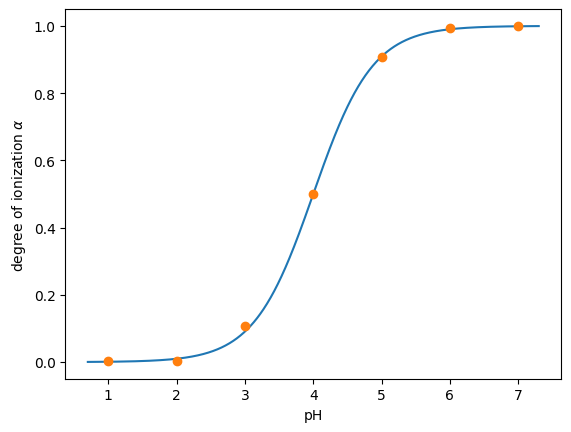

In [23]:
pH_range = np.linspace(0.7, 7.3, 1000)
Z_HH = pmb.calculate_HH(molecule_name='polyacid',
                        pH_list = pH_range)

plt.plot(pH_range, -np.asarray(Z_HH)/10, label=r"Henderson-Hasselbalch")
plt.plot(pH_values, alpha_values, linestyle="none", marker="o", label=r"Simulation")
plt.xlabel(r"pH")
plt.ylabel(r"degree of ionization $\alpha$")
plt.show()

## Setting Up Charge Regulating Peptides <a class="anchor" id="peptides"></a>

clean up before the second part

In [8]:
pmb.destroy_pmb_object_in_system(name = 'polyacid', 
                                 espresso_system = espresso_system)
pmb.filter_df(pmb_type = 'particle')

name  pmb_type             sigma                            cutoff  \
                                                                          
0  cation  particle  1 reduced_length  1.122462048309373 reduced_length   

             offset           epsilon state_one             
                                          label es_type  z  
0  0 reduced_length  1 reduced_energy    cation       2  1

In [9]:
peptide_sequence = 3*"E" + 2*"H" + 5*"K" + 4*"D"

In [10]:
path_to_interactions=pmb.get_resource("parameters/peptides/Lunkad2021.json")
path_to_pka=pmb.get_resource("parameters/pka_sets/CRC1991.json")
pmb.load_interaction_parameters(filename=path_to_interactions)
pmb.load_pka_set(filename=path_to_pka)
model = '2beadAA'  # Model with 1 beads per each aminoacid

In [11]:
pmb.define_peptide(name='peptide', 
                   sequence=peptide_sequence, 
                   model=model)

In [12]:
pmb.define_particle(name='anion',
                    z=-1,
                    sigma=1*pmb.units('reduced_length'), 
                    epsilon=1*pmb.units('reduced_energy'))

In [13]:
# Add all bonds to espresso system
pmb.add_bonds_to_espresso(espresso_system=espresso_system)

# Create your molecules into the espresso system
pmb.create_pmb_object(name='peptide',
                      number_of_objects=1,
                      espresso_system=espresso_system)

# Create counterions for the peptide chains
pmb.create_counterions(object_name='peptide',
                       cation_name='cation',
                       anion_name='anion',
                       espresso_system=espresso_system)

The following counter-ions have been created: 
Ion type: anion created number: 7
Ion type: cation created number: 0


{'anion': 7, 'cation': 0}

In [17]:
def sample_charge(pH):
    # Set the correct pH-value
    cpH, labels = pmb.setup_cpH(counter_ion="cation",
                                constant_pH=pH)

    # Equilibration
    cpH.reaction(reaction_steps=50)

    # Sampling
    charges = []
    for i in range(100):
        cpH.reaction(reaction_steps=10)
        charge_dict = pmb.calculate_net_charge(espresso_system=espresso_system, 
                                               molecule_name='peptide',
                                               dimensionless=True)
        charges.append(charge_dict['mean'])

    return np.mean(charges)

In [22]:
pH_values = [2.0+i*2.0 for i in range(7)]
charge_values = []

for pH in tqdm(pH_values):
    charge_values.append(sample_charge(pH))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:24<00:00,  3.57s/it]


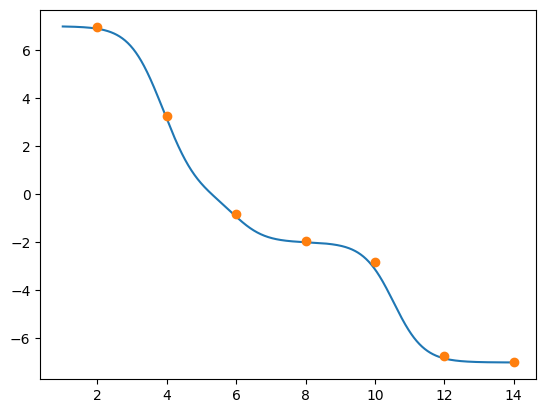

In [23]:
pH_range = np.linspace(1.0, 14.0, 1000)
Z_HH = pmb.calculate_HH(molecule_name='peptide',
                        pH_list = pH_range)

plt.plot(pH_range, Z_HH)
plt.plot(pH_values, charge_values, linestyle="none", marker="o")
plt.show()

## Conclusion and Outlook <a class="anchor" id="conclusion"></a>